# NumPy, Scipy를 활용한 확률 변수 이해
1. [Markdown](https://colab.research.google.com/notebooks/markdown_guide.ipynb) 문서에서 수식을 작성할 수 있는 능력을 기른다. Markdown의 수식은 [Latex Equation 문법](https://en.wikibooks.org/wiki/LaTeX/Mathematics)을 따른다. wysiwyg 형태의 Web 기반[Equation Editor](https://www.latex4technics.com/) 등을 활용하여 Latex Equation 작성을 연습해보라. 이어 문제 T2~T6에서 요구하는 Equation을 완성하라.
1. [NumPy](https://numpy.org/doc/stable/reference/)의 ndarray와 Python list의 차이, 그리고 자료형의 특성에 대해 문제 T1을 통해 이해한다. 
1. [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) package를 활용하여 주요 확률 변수들에 대해 PMF, PDF/CDF 그래프를 그리는 코드를 문제 T2~T6에서 작성한다.

##T1. Python List vs. Numpy NdArray
Numpy는 소위 [Vectorization](https://rfriend.tistory.com/tag/vectorization) [[2]](https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/)라는 개념을 통해 for loop을 사용하지 않고도 다수의 데이터에 대한 연산을 매우 빠르게 수행할 수 있다. 다만 Python list와 달리 유연성에 제약이 있고 자료형에 대한 이해와 관심이 필요하다.

아래는 입력 값 N에 대하여 $10^1 \cdots 10^N$을 구하고 이를 그래프로 표현하려는 코드이다. Python의 경우 계산 결과를 r_list라는 이름을 가진 list로, NumPy의 경우 r_numpy라는 이름을 가진 ndarray에 저장하고자 한다.

1. 주어진 코드는 r_list 값을 얻는 과정에서 에러가 발생한다. r_list에 적절한 값이 저장될 수 있도록 코드를 수정하라. r_list의 구조는 list를 유지하여야 한다. 
1. 입력 N을 20으로 변경하라. 두 계산 결과가 동일한가? 동일하지 않을 경우 그 이유를 파악하고 바로 아래 Text 셀에 그 이유를 설명하는 글을 작성하라. 
1. r_numpy를 구하는 코드를 수정하여 두 결과가 일치(?) 하도록 코드를 수정하라
---
<font color="blue">**답변** (python3 부터는 int 자료형이 arbitrary precision을 지원하는데, 이는 오버플로우가 일어날 상황에 대비해 가용 메모리를 수 표현에 끌어다 쓰는것이다. 그렇기에 python에서는 오버플로우가 일어나지 않았고, numpy의 ndarray는 int64비트 데이터 타입을 사용해서 10의 20승에서 오버플로우가 일어나게 되어 값이 음수로 변하게 된다.)</font>

uint64


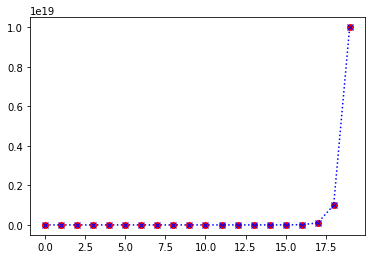

In [ ]:
N =  20#@param {type:"integer"}
import numpy as np
import matplotlib.pyplot as plt

n_list = list(range(N))
n_numpy = np.arange(N, dtype=np.uint64)

r_list = []
for i in range(len(n_list)) :
 r_list.append(10**n_list[i])
# r_list = 10**n_list
r_numpy = 10**n_numpy
print(r_numpy.dtype)

plt.plot(n_list, r_list, "ro", n_numpy, r_numpy, "b:x")
plt.show()

# Discrete Random Variables

## A0. scipy.stats 활용
---
>scipy.stats의 확률변수/분포 중 이번 숙제에서 사용할 것들은 다음과 같다
> * bernoulli : Bernoulli / 베르누이확률변수/분포
> * binom : Binomial / 이항확률변수/분포
> * geom : Geomertry / 기하확률변수/분포
> * poisson : Poisson / 포아송확률변수/분포
> * uniform : Uniform / 항등(균등)확률변수/분포
> * expon : Exponential / 지수확률변수/분포
> * norm : Gaussian(Normal) / 정규확률변수/분포
> * gamma : Gamma / 감마확률변수/분포
> * t : Student's T / 스튜던트 T 확률변수/분포

>scipy.stats에서 확률변수 활용의 기본 구조는 아래와 같다. 코드에서 distribution에 위에 나열된 특정 확률변수/분포 이름을 사용한다. 그리고 params에 해당 확률변수/분포에 종속적인 인자(들)을 적는다. 인자의 수와 의미는 reference를 참고하여야 한다. 
```python
import scipy.stats as stats
rv = stats.distribution(params) 
rv.mean()   #평균 
rv.var()    #분산 
rv.pmf(2)   #PMF Pr(X=2)
rv.cdf(3)   #CDF Pr(X<=3)
```

>아래 Section A1과 A2는 이산확률변수인 Bernoulli와 연속확률변수인 Uniform의 코드 작성 예를 보인 것이다. 이를 참조하여 T2~T6 Section의 확률 변수에 대해 PMF/PDF 수식을 작성하고 PMF 또는 PDF/CDF 그래프를 그려라. 

## A1. Bernoulli Random Variable $X \sim Bernoulli(p)$
A random variable which takes the value 1 with probability $p$ and the value 0 with probability $q=1-p$. 
* $P_{X}(k) = \begin{cases}
  1-p & \quad k=0\\
  p & \quad k=1 
  \end{cases}$

X ~ Bernoulli(p=0.3)
E  [X]= 0.3
Var[X]= 0.21


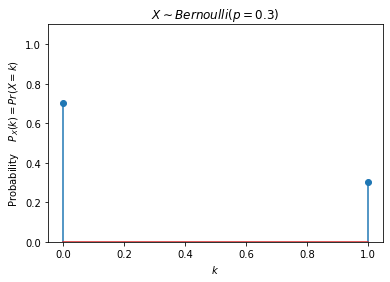

In [ ]:
p =  0.3#@param {type:"number"}
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

rv = stats.bernoulli(p)
Ks = np.array([0,1])

print(f'X ~ Bernoulli(p={p})')
print(f'E  [X]= {rv.mean()}')
print(f'Var[X]= {rv.var()}')

plt.stem(Ks, rv.pmf(Ks),use_line_collection=True)
plt.ylim(0,1.1)
plt.ylabel(r'Probability    $P_X(k) = Pr(X=k)$')
plt.xlabel(r'$k$')
plt.title('$X \sim Bernoulli(p={})$'.format(p))
plt.show()

## T2. Binomial Random Variable $X \sim B(n,p)$

Repeating a Bernoulli trial $n$ times, where the outcome of an trial is 1 with probability $p$ and the outcome of each trial is **independent** of all others.
  
* $P_X (k) = C(n,k)\cdot p^k (1-p)^{n-k} k=0,1,2,\dots, n $

X ~ B(N=20,p=0.3)

E  [X]= 6.0
Var[X]= 4.199999999999999


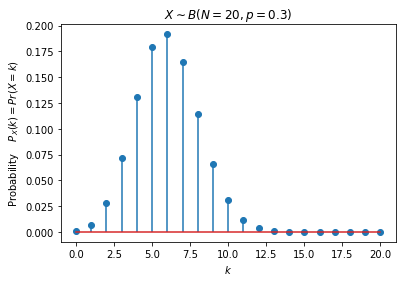

In [ ]:
p = 0.3 #@param {type:"number"}
N = 20 #@param {type:"integer"}

rv = stats.binom(N, p)
Ks = np.arange(N+1) # k = 0, ... , N
print(f'X ~ B(N={N},p={p})\n')
print(f'E  [X]= {rv.mean()}')
print(f'Var[X]= {rv.var()}')

plt.stem(Ks, rv.pmf(Ks),use_line_collection=True)
plt.ylabel(r'Probability    $P_X(k) = Pr(X=k)$')
plt.xlabel(r'$k$')
plt.title('$X \sim B(N={},p={})$'.format(N, p))
plt.show()

## T3. Geometric Random Variable $X \sim Geo(p)$

The probability distribution of the number $X$ of Bernoulli trials needed to get one success, supported on the set $\{ 1, 2, 3, \cdots \}$

* $P_X (k) = (1-p)p^{k-1} , \quad  k=1,2, 3, \cdots $ 


3
X ~ Geo(p=0.3)

E  [X]= 3.3333333333333335
Var[X]= 7.777777777777779


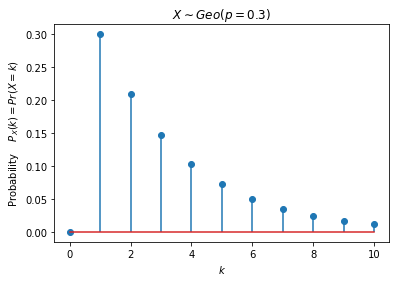

In [ ]:
p = 0.3 #@param {type:"number"}

rv = stats.geom(p)
print(int(rv.mean()))
Ks = np.arange(int(rv.mean()*3.5))
print(f'X ~ Geo(p={p})\n')
print(f'E  [X]= {rv.mean()}')
print(f'Var[X]= {rv.var()}')

plt.stem(Ks, rv.pmf(Ks),use_line_collection=True)
plt.ylabel(r'Probability    $P_X(k) = Pr(X=k)$')
plt.xlabel(r'$k$')
plt.title('$X \sim Geo(p={})$'.format(p))
plt.show()

## T4. Poisson Random Variable $X \sim Pois(\lambda)$

This random variable expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known **constant mean rate**$\lambda$ and **independently** of the time since the last event

* $P_X (k) = \frac{\lambda^k}{k!} \cdot e^{-\lambda}, \quad  k=0,1,2,\cdots$


X ~ Poisson(Rate=3.0)

E  [X]= 3.0
Var[X]= 3.0


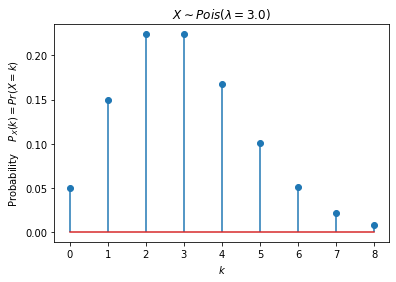

In [ ]:
Rate = 3.0 #@param {type:"number"}

rv = stats.poisson(Rate)
Ks = np.arange(int(rv.mean()*3))
print(f'X ~ Poisson(Rate={Rate})\n')
print(f'E  [X]= {rv.mean()}')
print(f'Var[X]= {rv.var()}')

plt.stem(Ks, rv.pmf(Ks),use_line_collection=True)
plt.ylabel(r'Probability    $P_X(k) = Pr(X=k)$')
plt.xlabel(r'$k$')
plt.title('$X \sim Pois(\lambda={})$'.format(Rate))
plt.show()

# Continuous Random Variables

## A2. Uniform Random Variable $X \sim U(a,b)$
The uniform distribution is a continuous probability distribution and is concerned with events that are equally likely to occur on the interval $[a,b]$
* $f_{X}(x) = \begin{cases}
  \frac{1}{b-a} & \quad a \le x \le b\\
  0 & \quad \text{otherwise} 
  \end{cases}$

E  [X]= 3.5
Var[X]= 0.75


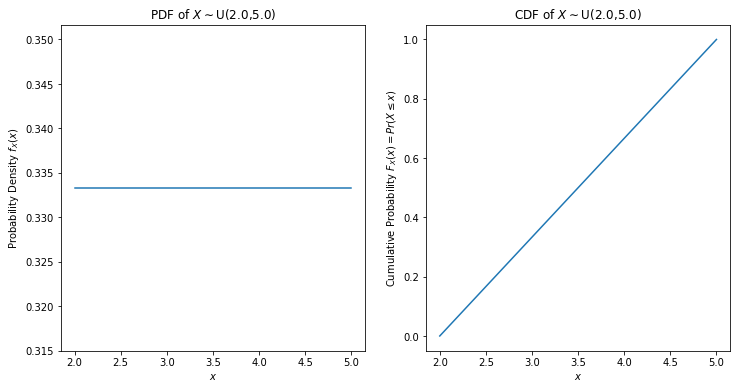

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def draw_pdf_cdf(ran_var, x_interval, title_str) :
  print(f'E  [X]= {ran_var.mean()}')
  print(f'Var[X]= {ran_var.var()}')
  plt.rcParams['figure.figsize'] = [12,6]
  fig = plt.figure()
  ax1 = fig.add_subplot(1,2,1)
  ax1.plot(Xs, ran_var.pdf(Xs))
  ax1.set_ylabel('Probability Density $f_X(x)$')
  ax1.set_xlabel('$x$')
  ax1.set_title('PDF of $X \sim $'+title_str)

  ax2 = fig.add_subplot(1,2,2)
  ax2.plot(Xs, ran_var.cdf(Xs))
  ax2.set_ylabel('Cumulative Probability $F_X(x) = Pr(X \leq x)$')
  ax2.set_xlabel('$x$')
  ax2.set_title('CDF of $X \sim $'+title_str)
  plt.show()

#===================
a = 2.0 #@param {type:"number"}
b = 5.0 #@param {type:"number"}

rv = stats.uniform(a, b-a)
Xs = np.linspace(a,b,100)

draw_pdf_cdf(rv, Xs, 'U({},{})'.format(a,b))

## T5. Exponential Random Variable $X \sim Exp(\lambda)$
the probability distribution of **the time between events** in a Poisson point process, i.e., a process in which events occur **continuously and independently at a constant average rate** $\lambda$. It is a particular case of the gamma distribution.
* $f_{X}(x) = \lambda{e^{-\lambda x}} ,   \quad x \geq 0$


E  [X]= 0.3333333333333333
Var[X]= 0.1111111111111111


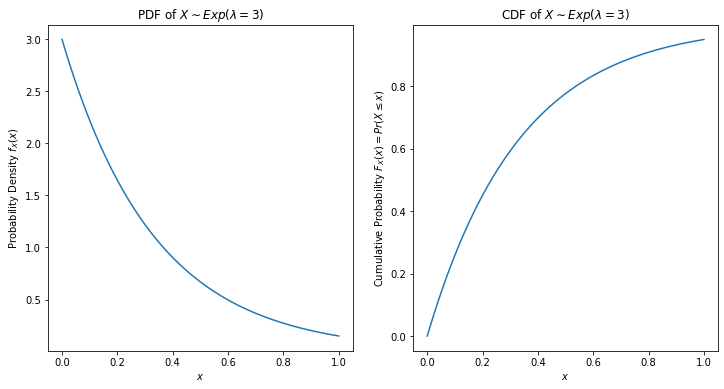

In [ ]:
Rate =  3#@param {type:"number"}

rv = stats.expon(0, scale = 1 / Rate)
Xs = np.linspace(0, 3/Rate ,100)

draw_pdf_cdf(rv, Xs, '$Exp(\lambda={})$'.format(Rate))

## T6. Gaussian Random Variable $X \sim N(\mu, \sigma^2)$
The parameter $\mu$  is the mean or expectation of the distribution, while the parameter $\sigma$  is its standard deviation. The variance of the distribution is $\sigma^2$. A random variable with a Gaussian distribution is said to be normally distributed, and is called a normal deviate.

* $f_{X}(x) = \frac{1}{\sqrt{2\pi\sigma^2} } \cdot e^{-\frac{{(x-m)^2}}{2\sigma^2}},   \quad x \in (-\infty, \infty) $

E  [X]= 1.0
Var[X]= 2.25


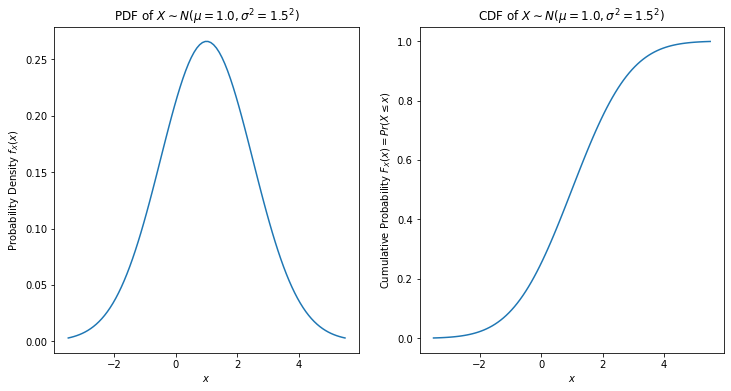

In [ ]:
mu =  1.0#@param {type:"number"}
sigma =  1.5#@param {type:"number"}

rv = stats.norm(loc = mu, scale = sigma)
Xs = np.linspace(mu-3*sigma,mu+3*sigma,100)

draw_pdf_cdf(rv, Xs,'$N(\mu={},\sigma^2={}^2)$'.format(mu, sigma))


## A3. Gamma Random Variable $X \sim Gamma(k, \theta)$

The gamma distribution is a two-parameter family of continuous probability distributions. The exponential distribution, Erlang distribution, and chi-square distribution are special cases of the gamma distribution. There are two different parameterizations in common use:

1.   With a shape parameter $k$ and a scale parameter $\theta$.
2.   With a shape parameter $\alpha=k$ and an inverse scale parameter $\beta=1/\theta$, called a rate parameter.

* $f_{X}(x) = \frac{1}{\Gamma(k) \cdot \theta^k } \cdot x^{k-1} e^{-\frac{x}{\theta}},   \quad x \in (0, \infty) $

The Gamma Function - $\Gamma(k)$ - is one commonly used extension of the factorial function to complex numbers.
* For any positive integers, $\Gamma(k)=(k-1)!$
* For complex numbers with a positive real part, $\Gamma(z)=\int_{0}^{\infty} x^{z-1} \cdot e^{-x} dx$

E  [X]= 1.0
Var[X]= 1.0


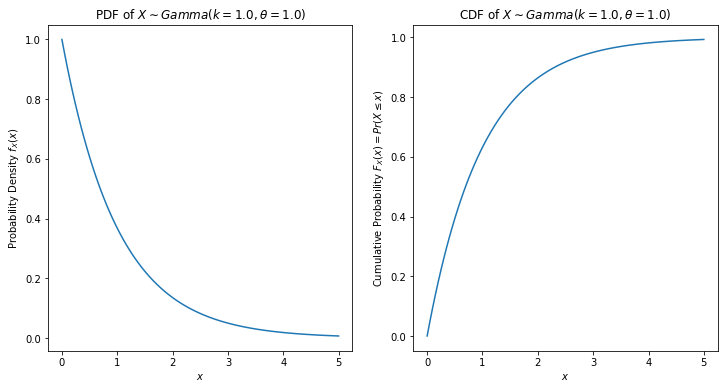

In [ ]:
k = 1.0 #@param {type:"number"}
theta = 1.0 #@param {type:"number"}

rv = stats.gamma(k, scale=theta)
Xs = np.linspace(0,5*theta,100)

draw_pdf_cdf(rv, Xs,'$Gamma(k={},\\theta={})$'.format(k, theta))

## A4. Student's *T* Random Variable / *T* Disribution $X \sim T(\nu)$
A family of continuous probability distributions that arise when estimating the mean of a normally-distributed population in situations where the sample size is small and the population's standard deviation is unknown.

if we take a sample of $n$ observations from a normal distribution, then **the t-distribution with $\nu =n-1$ degrees of freedom** can be defined as the distribution of the location of the sample mean relative to the true mean, divided by the sample standard deviation, after multiplying by the standardizing term $\sqrt{n}$. In this way, the t-distribution can be used to construct a confidence interval for the true mean.

* $f_{X}(x,\nu) = \frac{\Gamma((\nu+1)/2)}{\sqrt{\pi \nu} \cdot \Gamma(\nu/2) } \cdot {\frac{(1+x^2)}{\nu}}^{-(\nu+1)/2},   \quad x \in (-\infty, \infty), \nu > 0 $

E  [X]= 0.0
Var[X]= 2.0


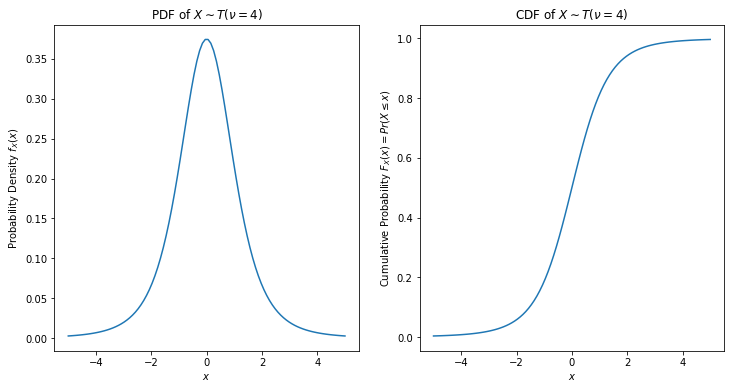

In [ ]:
nu =  4#@param {type:"number"}

rv = stats.t(nu)
Xs = np.linspace(-5,5,100)

draw_pdf_cdf(rv, Xs,'$T(\\nu={})$'.format(nu))